In [1]:
import pandas as pd
import numpy as np
# import re
# 忽略警告
import warnings
warnings.filterwarnings(action='ignore')

In [9]:
loneliness = pd.read_excel("https://github.com/Dora-fxh/0006/raw/master/london-loneliness-MSOA-LSOA.xlsx",sheet_name="LSOA")[["LSOA","LSOA name","Log odds"]]
loneliness.columns = ["codes","names","loneliness"]

In [10]:
loneliness.head()

codes                      names  loneliness
0  E01000027  Barking and Dagenham 001A   -3.384520
1  E01000028  Barking and Dagenham 001B   -3.299572
2  E01000029  Barking and Dagenham 001C   -3.734437
3  E01000030  Barking and Dagenham 001D   -3.477077
4  E01000031  Barking and Dagenham 002A   -3.612172

In [3]:
census_data = pd.read_excel("https://github.com/Dora-fxh/0006/raw/master/lsoa-data.xls", sheet_name="iadatasheet1",header=[0,1,2])
census_data_1 = pd.read_excel("https://github.com/Dora-fxh/0006/raw/master/lsoa-data.xls", sheet_name="iadatasheet2",header=[0,1,2])
exclusion_df = pd.read_excel("https://github.com/Dora-fxh/0006/raw/master/Propensity for Social Exclusion of Older People in London Data.xlsx", sheet_name="Data",header=[0,1,2])

In [90]:
# census_data = pd.read_excel("./lsoa-data.xls", sheet_name="iadatasheet1",header=[0,1,2])
# census_data_1 = pd.read_excel("./lsoa-data.xls", sheet_name="iadatasheet2",header=[0,1,2])
# exclusion_df = pd.read_excel("./Propensity for Social Exclusion of Older People in London Data.xlsx", sheet_name="Data",header=[0,1,2])

In [25]:
census_data.head()

Unnamed: 0_level_0 Unnamed: 1_level_0 Mid-year Population Estimates        \
  Unnamed: 0_level_1 Unnamed: 1_level_1                      All Ages         
               Codes              Names                          2001  2002   
0          E01000907        Camden 001A                          1519  1538   
1          E01000908        Camden 001B                          1547  1577   
2          E01000909        Camden 001C                          1600  1598   
3          E01000912        Camden 001D                          1738  1728   
4          E01000913        Camden 001E                          1617  1676   

                                       ...     House Prices           \
                                       ... Median Price (£)            
   2003  2004  2005  2006  2007  2008  ...             2011     2012   
0  1528  1547  1593  1492  1455  1457  ...           415000   355000   
1  1605  1637  1629  1598  1605  1526  ...           282500   335000   
2  1618  1634  1610  1635  1615  1584  ...           435000  1475000   
3  1678  1707  1710  1669  1645  1618  ...           500000   373000   
4  1662  1714  1705  1690  1716  1657  ...          1000000   737500   

                                                     
                     Sales                           
       2013     2014  2009 2010 2011 2012 2013 2014  
0  481249.5   568500     9   14   11   12   16   26  
1    287500   350000    23   17   21   27   24   22  
2   1052000  1412500    11   15   19   15   16   16  
3    572750   725000    17   22   17   10   10   11  
4    734500   996585    35   44   31   30   22   33  

[5 rows x 185 columns]

In [4]:
def get_ratio(first_level_column, columns, dataframe=census_data, delete_level3=True):
    """ params:
        dataframe: have 3 level of columns index
        first_level_column: which first level column contains the stb dataframe you want
        columns: which columns you would like to keep
    """
    ratio_df = dataframe[first_level_column]  
    if delete_level3:
        # we don't need the year-index in census_data
        ratio_df.columns = ratio_df.columns.droplevel(1)
    ratio_df = ratio_df.iloc[:,columns]
    return ratio_df

In [5]:
codes = census_data["Unnamed: 0_level_0","Unnamed: 0_level_1","Codes"]
codes.name="codes"
names = census_data["Unnamed: 1_level_0","Unnamed: 1_level_1","Names"]
names.name="names"
census_data_df = pd.concat([codes,names,get_ratio("Ethnic Group",6), get_ratio("Religion",16), get_ratio("Tenure",4),\
                         get_ratio("Qualifications",13,census_data_1)],axis=1)

In [72]:
codes = exclusion_df["LSOA Code","Unnamed: 0_level_1","Unnamed: 0_level_2"]
codes.name="codes"
names = exclusion_df["LSOA Name","Unnamed: 1_level_1","Unnamed: 1_level_2"]
names.name="names"
safety = exclusion_df["Safety","Fear of crime"]
exclusion_data_df = pd.concat([codes,names,get_ratio("Economic Situation",0,exclusion_df),\
                               get_ratio("Transport Accessibility",[0,1],exclusion_df),get_ratio("Household Ties",[0,1],exclusion_df),\
                               get_ratio("Neighbourhood Ties",[0,1],exclusion_df),get_ratio("Health",1,exclusion_df),\
                               safety],axis=1)

In [40]:
census_data_df.head()

codes  White (%)  No religion (%)  Owned outright (%)  \
0  E01000907  73.496503             32.7                12.6   
1  E01000908  72.422517             27.5                14.0   
2  E01000909  84.076828             34.1                38.3   
3  E01000912  77.344242             31.5                15.3   
4  E01000913  88.187135             27.5                47.1   

   % Highest level of qualification: Level 4 qualifications and above  
0                                               44.2                   
1                                               50.4                   
2                                               61.9                   
3                                               47.2                   
4                                               65.2

In [73]:
full_data_df = pd.merge(pd.merge(exclusion_data_df, census_data_df, on=['codes','names'],how="outer"),loneliness,on=['codes','names'],how="outer")
full_data_df.head()

codes                      names  \
0  E01000006  Barking and Dagenham 016A   
1  E01000007  Barking and Dagenham 015A   
2  E01000008  Barking and Dagenham 015B   
3  E01000009  Barking and Dagenham 016B   
4  E01000010  Barking and Dagenham 015C   

   Income Deprivation Affecting Older People (IDAOPI) Score  \
0                                              0.210          
1                                              0.356          
2                                              0.423          
3                                              0.385          
4                                              0.494          

   Public Transport Accessibility Score  Percent aged 65+ with no car  \
0                              6.361348                     38.636364   
1                              6.787546                     63.793103   
2                              3.133773                     52.500000   
3                              7.145551                     53.038674   
4                              6.867345                     59.523810   

   Percent aged 65+ living in one person household  \
0                                        18.045113   
1                                        68.965517   
2                                        30.000000   
3                                        35.359116   
4                                        38.095238   

   Percent aged 65+ providing 50 or more hours unpaid care a week  \
0                                           5.303030                
1                                           3.448276                
2                                           7.500000                
3                                           3.867403                
4                                           7.142857                

   Percent aged 65+ who cannot speak English well  Churn Rate  \
0                                       16.541353   27.422196   
1                                       15.517241   35.657800   
2                                       12.500000   26.878238   
3                                       21.546961   31.866892   
4                                       13.095238   41.267606   

   Percent aged 65 + with a limiting long-term health problem or disability   \
0                                          59.090909                           
1                                          63.793103                           
2                                          52.500000                           
3                                          71.270718                           
4                                          57.142857                           

   Percent worried about anti-social behaviour in area   \
0                                          35.464722      
1                                          35.464722      
2                                          35.464722      
3                                          35.464722      
4                                          35.464722      

   Percent who feel unsafe walking alone after dark  White (%)  \
0                                         28.962581  32.706988   
1                                         28.962581  31.560029   
2                                         28.962581  31.411917   
3                                         28.962581  23.801466   
4                                         28.962581  28.591549   

   No religion (%)  Owned outright (%)  \
0              8.0                25.0   
1             11.6                 4.1   
2             13.1                 4.6   
3              6.1                18.2   
4             10.8                 5.5   

   % Highest level of qualification: Level 4 qualifications and above  \
0                                               32.9                    
1                                               32.3                    
2                                               24.2                    
3                    

In [74]:
full_data_df.shape

(4835, 17)

In [45]:
census_data_df.shape

(4835, 6)

In [46]:
exclusion_data_df.shape

(4829, 14)

In [47]:
loneliness.shape

(4835, 3)

In [17]:
np.any(full_data_df.isna())

True

In [18]:
full_data_df.dtypes.value_counts()

float64    17
object      2
dtype: int64

<AxesSubplot:>

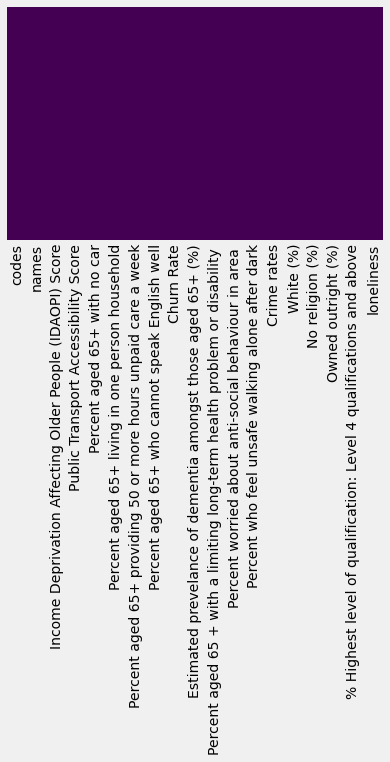

In [19]:
import seaborn as sns
import missingno as mg
sns.heatmap(full_data_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:>

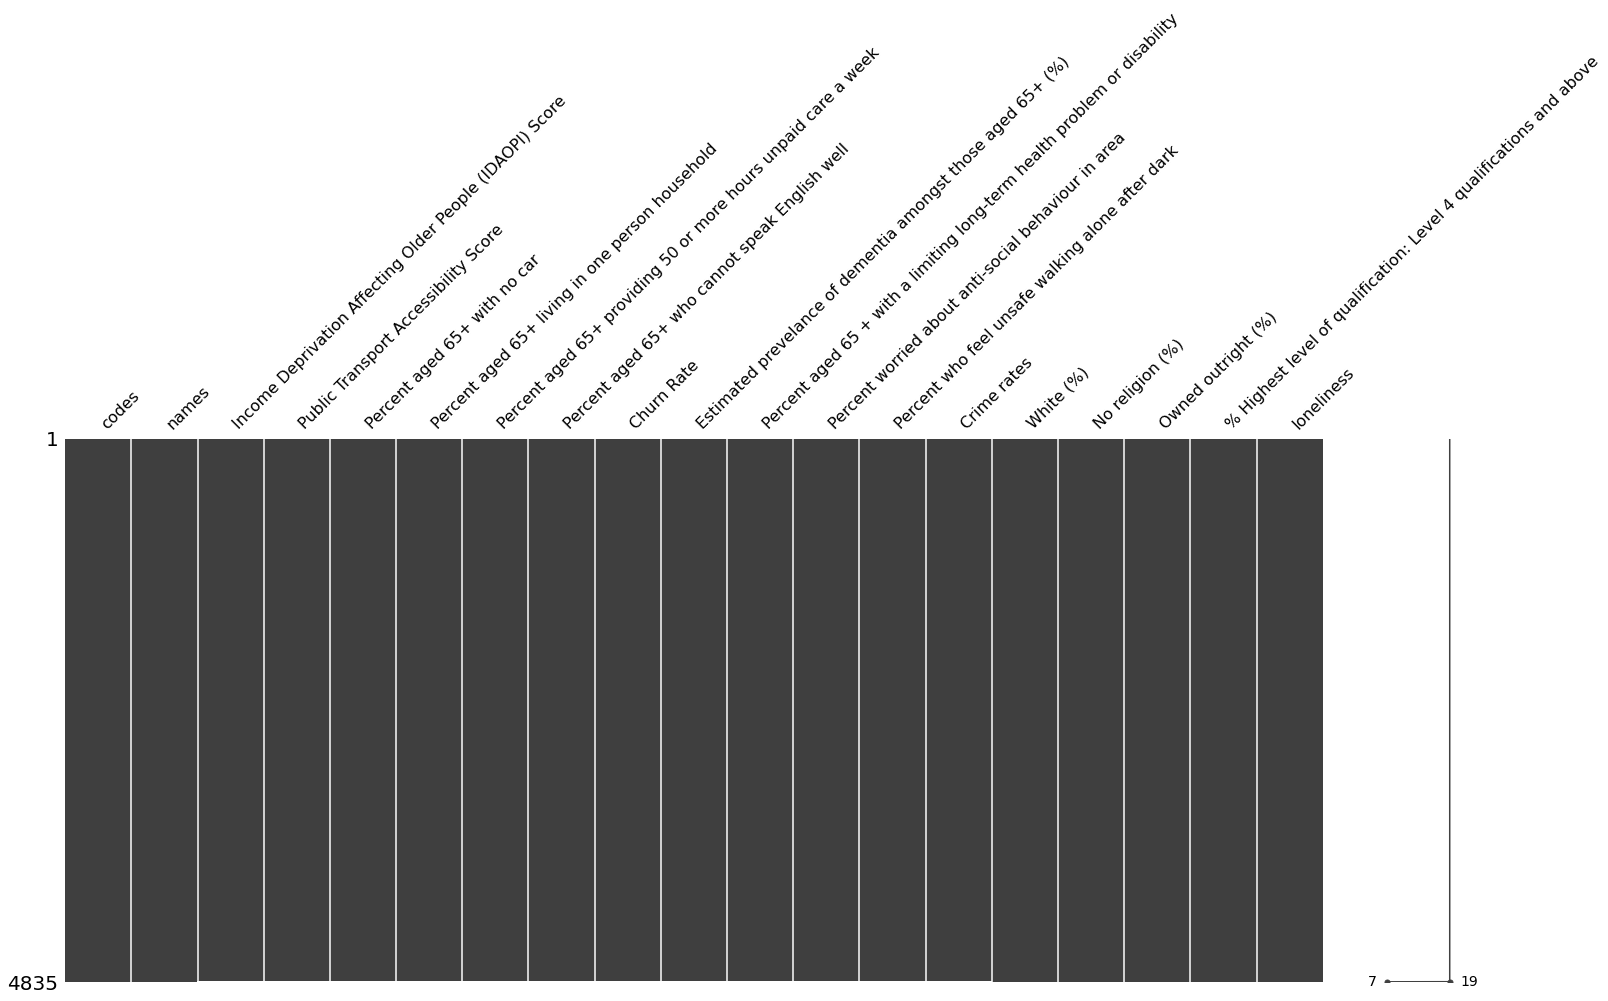

In [9]:
mg.matrix(full_data_df)

In [75]:
full_data_df.dropna(axis=0,inplace=True)
full_data_df.shape

(4829, 17)

In [21]:
import matplotlib.pyplot as plt
import matplotlib.style as style
from scipy import stats

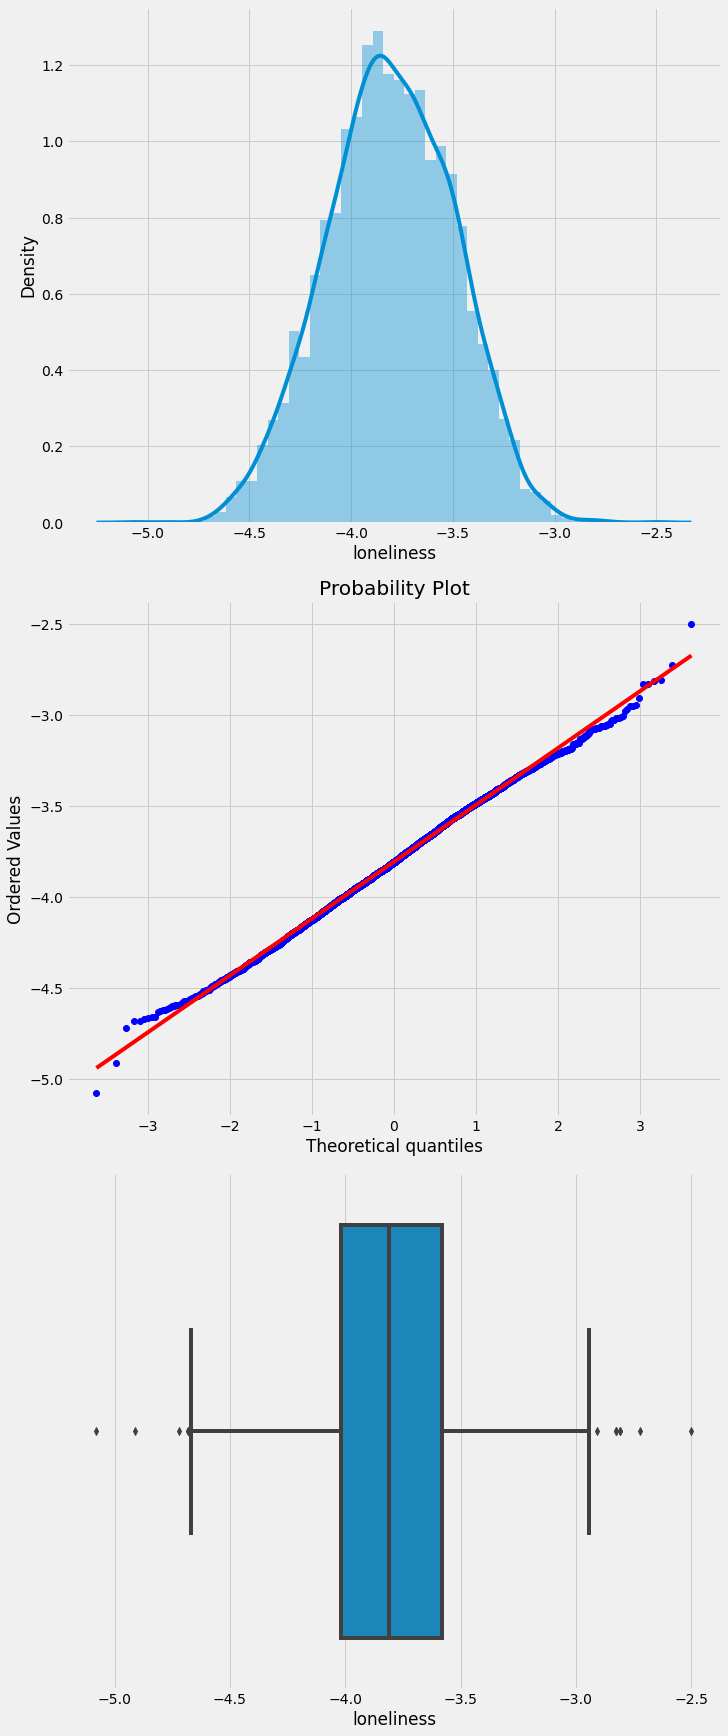

In [24]:
def plot_1(df,feature):
    # 一种图的格式
    style.use('fivethirtyeight')
    fig,axes = plt.subplots(3,1,constrained_layout=True,figsize=(10,24))
    # 画直方图与连续概率密度估计图
    # norm_hist=True:如果为True，则直方图的高度显示密度而不是计数
    sns.distplot(df.loc[:,feature],norm_hist=True,ax=axes[0])
    
    # 通过比较数据和正态分布的分位数是否相等来判断数据是不是符合正态分布
    stats.probplot(df.loc[:,feature],plot=axes[1])
    
    # 箱型图
    sns.boxplot(df.loc[:,feature],orient='h',ax=axes[2])
    

plot_1(full_data_df,'loneliness')

In [38]:
full_data_df.columns

Index(['codes', 'names',
       'Income Deprivation Affecting Older People (IDAOPI) Score',
       'Public Transport Accessibility Score', 'Percent aged 65+ with no car',
       'Percent aged 65+ living in one person household',
       'Percent aged 65+ providing 50 or more hours unpaid care a week',
       'Percent aged 65+ who cannot speak English well', 'Churn Rate',
       'Percent aged 65 + with a limiting long-term health problem or disability ',
       'Percent worried about anti-social behaviour in area ',
       'Percent who feel unsafe walking alone after dark', 'Crime rates',
       'White (%)', 'No religion (%)', 'Owned outright (%)',
       '% Highest level of qualification: Level 4 qualifications and above',
       'loneliness'],
      dtype='object')

In [85]:
loneliness_df = full_data_df.copy(deep=True)
loneliness_df.columns = ['LSOA_Codes', 'LSOA_Names','IDAOPI_Score','transport_Accessibility', 'no_Car',
       'one_Person_Household','50_Hours_Unpaid_Care','cannot_Speak_English', 'Churn_Rate',
       'health_Problem','worried_Anti-social','feel_Unsafe_Alone','White', 
       'No_Religion', 'Owned_Outright', 'Level_4_Qualifications', 'loneliness']

In [77]:
loneliness_df.describe()

IDAOPI_Score  transport_Accessibility       no_Car  \
count   4829.000000              4829.000000  4829.000000   
mean       0.250794                 3.739313    44.387990   
std        0.139095                 1.595725    17.855102   
min        0.017000                 0.300185     2.962963   
25%        0.139000                 2.593199    30.366492   
50%        0.231000                 3.337573    43.827160   
75%        0.345000                 4.659988    58.333333   
max        0.869000                 8.000000    96.428571   

       one_Person_Household  50_Hours_Unpaid_Care  cannot_Speak_English  \
count           4829.000000           4829.000000           4829.000000   
mean              35.336077              4.565746              7.005608   
std               10.693914              2.153527              7.498732   
min                0.000000              0.000000              0.000000   
25%               27.631579              3.076923              1.818182   
50%               34.636872              4.405286              4.571429   
75%               42.574257              5.839416              9.836066   
max               74.731183             17.647059             67.857143   

        Churn_Rate  health_Problem  worried_Anti-social  feel_Unsafe_Alone  \
count  4829.000000     4829.000000          4829.000000        4829.000000   
mean     27.229686       52.838506            24.509581          18.163705   
std      11.052311        9.903452             5.814295           5.039452   
min       7.119530        3.448276            13.602918           8.402355   
25%      19.018112       46.296296            20.801397          15.250445   
50%      25.475285       53.097345            23.573124          18.763875   
75%      33.469865       60.000000            26.702705          19.834625   
max     122.461538       83.870968            39.642063          31.368578   

             White  No_Religion  Owned_Outright  Level_4_Qualifications  \
count  4829.000000  4829.000000     4829.000000             4829.000000   
mean     60.691191    20.886912       21.954877               37.256036   
std      20.352593     8.821350       12.622111               14.503216   
min       3.543844     1.000000        0.200000                8.300000   
25%      45.925926    14.700000       11.600000               25.800000   
50%      63.076099    21.300000       20.200000               34.400000   
75%      77.504977    26.800000       30.700000               47.500000   
max      98.159057    50.200000       61.300000               83.800000   

        loneliness  
count  4829.000000  
mean     -3.806717  
std       0.312829  
min      -5.078883  
25%      -4.018122  
50%      -3.808526  
75%      -3.581541  
max      -2.499411

In [86]:
loneliness_df["IDAOPI_Score"] *= 100 

In [79]:
# 平方是确保非负，然后降序排列，第一个值是'loneliness'，不取
(loneliness_df.corr()**2)["loneliness"].sort_values(ascending=False)[1:]

health_Problem             0.670213
IDAOPI_Score               0.599583
no_Car                     0.565278
Owned_Outright             0.526141
one_Person_Household       0.291523
White                      0.183496
Level_4_Qualifications     0.121295
cannot_Speak_English       0.120982
worried_Anti-social        0.103256
transport_Accessibility    0.062392
feel_Unsafe_Alone          0.045798
Churn_Rate                 0.012874
50_Hours_Unpaid_Care       0.011815
No_Religion                0.001847
Name: loneliness, dtype: float64

<AxesSubplot:>

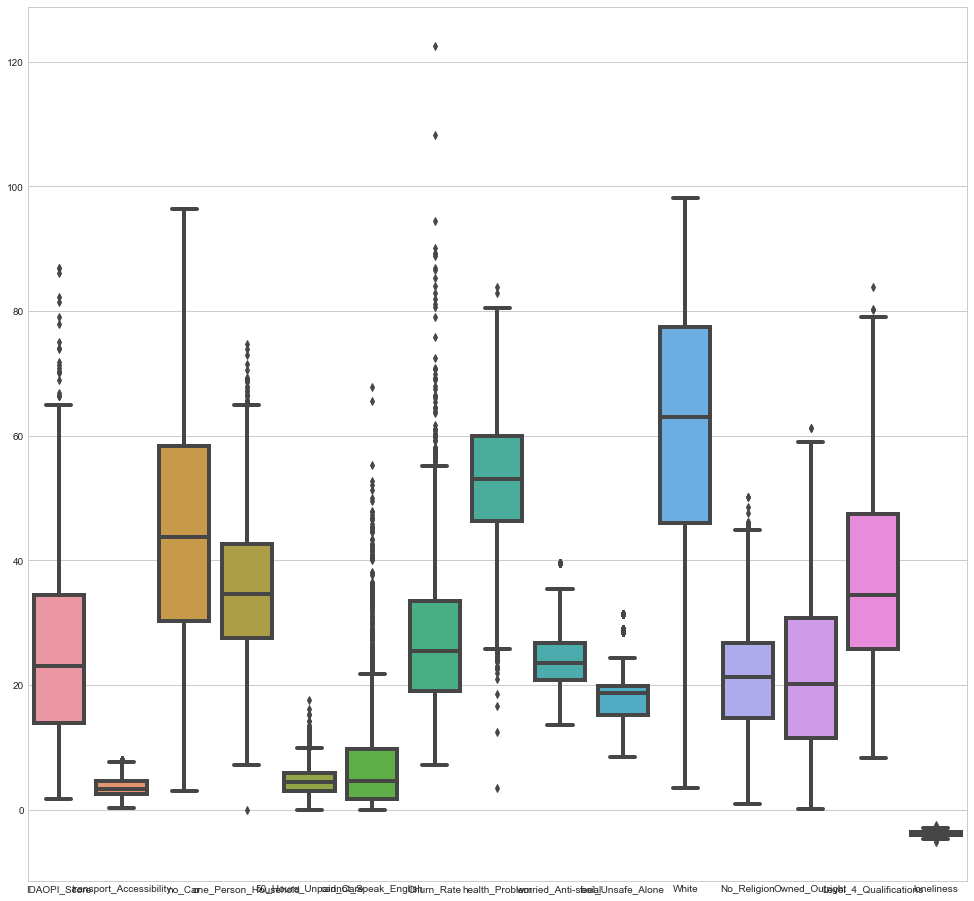

In [80]:
num = loneliness_df.shape[1]-2

# fig,axes = plt.subplots(3,5,constrained_layout=True,figsize=(15,15))
sns.set_style("whitegrid")
plt.figure(figsize=(15,15))
sns.boxplot(data=loneliness_df)


Text(0.5, 1.0, 'Heatmap of all the Features')

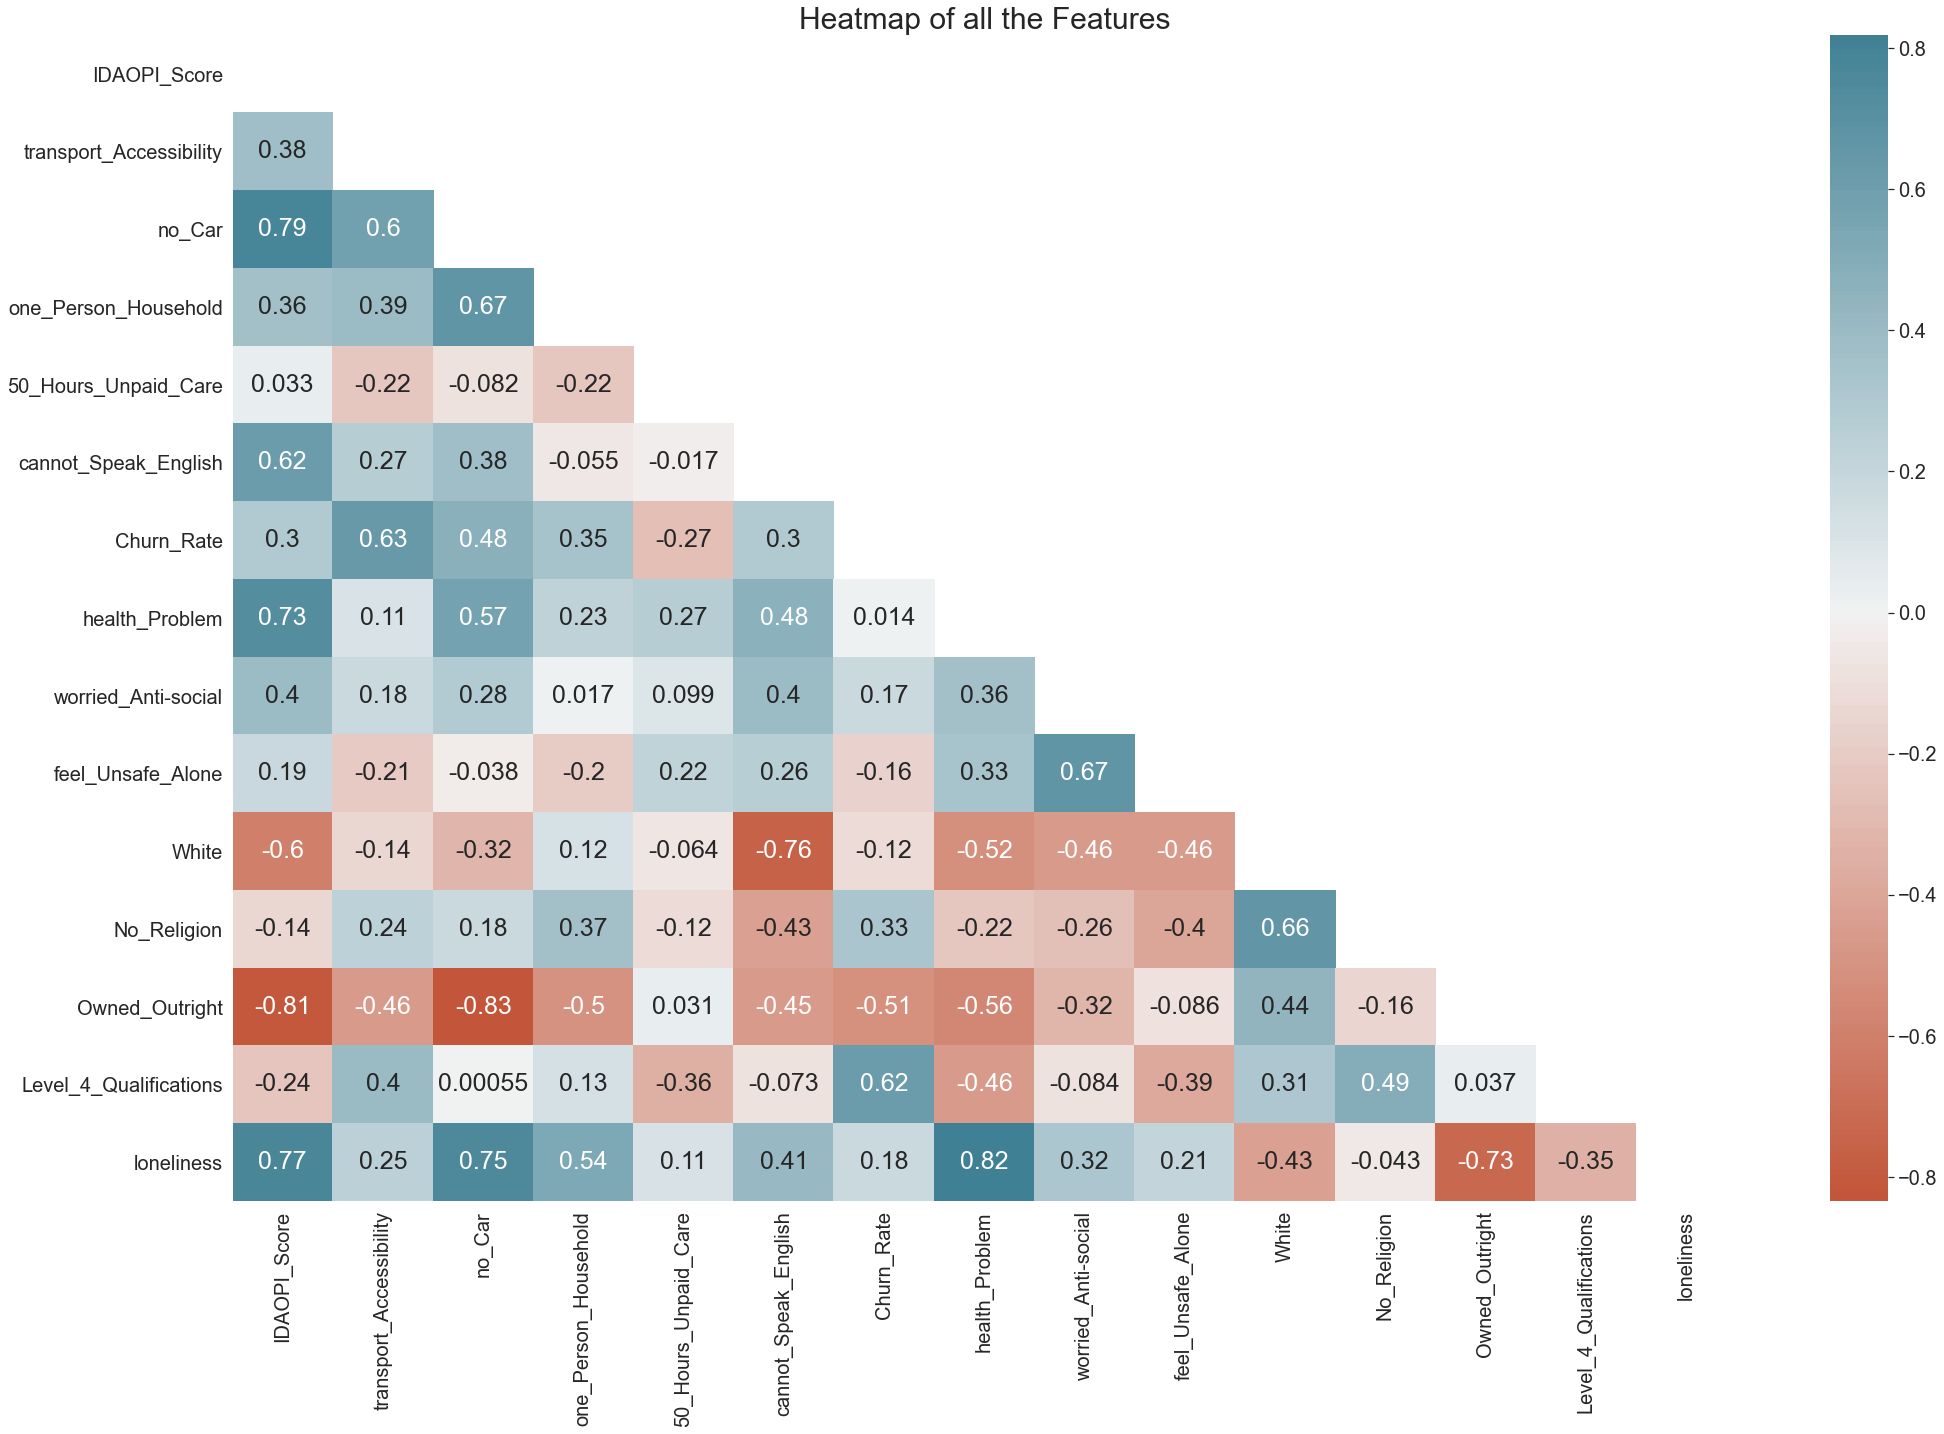

In [120]:
# Plot fig sizing. 
style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (30,20))
# Plotting heatmap. 
sns.set(font_scale=1)
# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(loneliness_df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(loneliness_df.corr(), 
            cmap=sns.diverging_palette(20, 220, n=200), 
            mask = mask, 
            annot=True, 
            center = 0,
            annot_kws={"fontsize":25}
           )

# Give title. 
plt.yticks(fontsize=20) #y轴刻度的字体大小（文本包含在pd_data中了）
plt.xticks(fontsize=20)
#设置colorbar的刻度字体大小
cax = plt.gcf().axes[-1] 
cax.tick_params(labelsize=20)
plt.title("Heatmap of all the Features", fontsize = 30)

In [50]:
loneliness_df['loneliness'].skew(),loneliness_df['loneliness'].kurtosis()

(-0.0464228217772256, -0.18666979414106333)

In [81]:
numeric_feats = loneliness_df.dtypes[loneliness_df.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = loneliness_df[numeric_feats].apply(lambda x: x.skew()).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness


Skew in numerical features: 



Skew
cannot_Speak_English     2.249121
Churn_Rate               1.314783
transport_Accessibility  0.791209
IDAOPI_Score             0.616680
50_Hours_Unpaid_Care     0.597964
feel_Unsafe_Alone        0.562318
Level_4_Qualifications   0.539312
Owned_Outright           0.517351
worried_Anti-social      0.494242
one_Person_Household     0.333046
no_Car                   0.098687
No_Religion              0.032372
loneliness              -0.046423
health_Problem          -0.215630
White                   -0.418722

There are 2 skewed numerical features to Box Cox transform


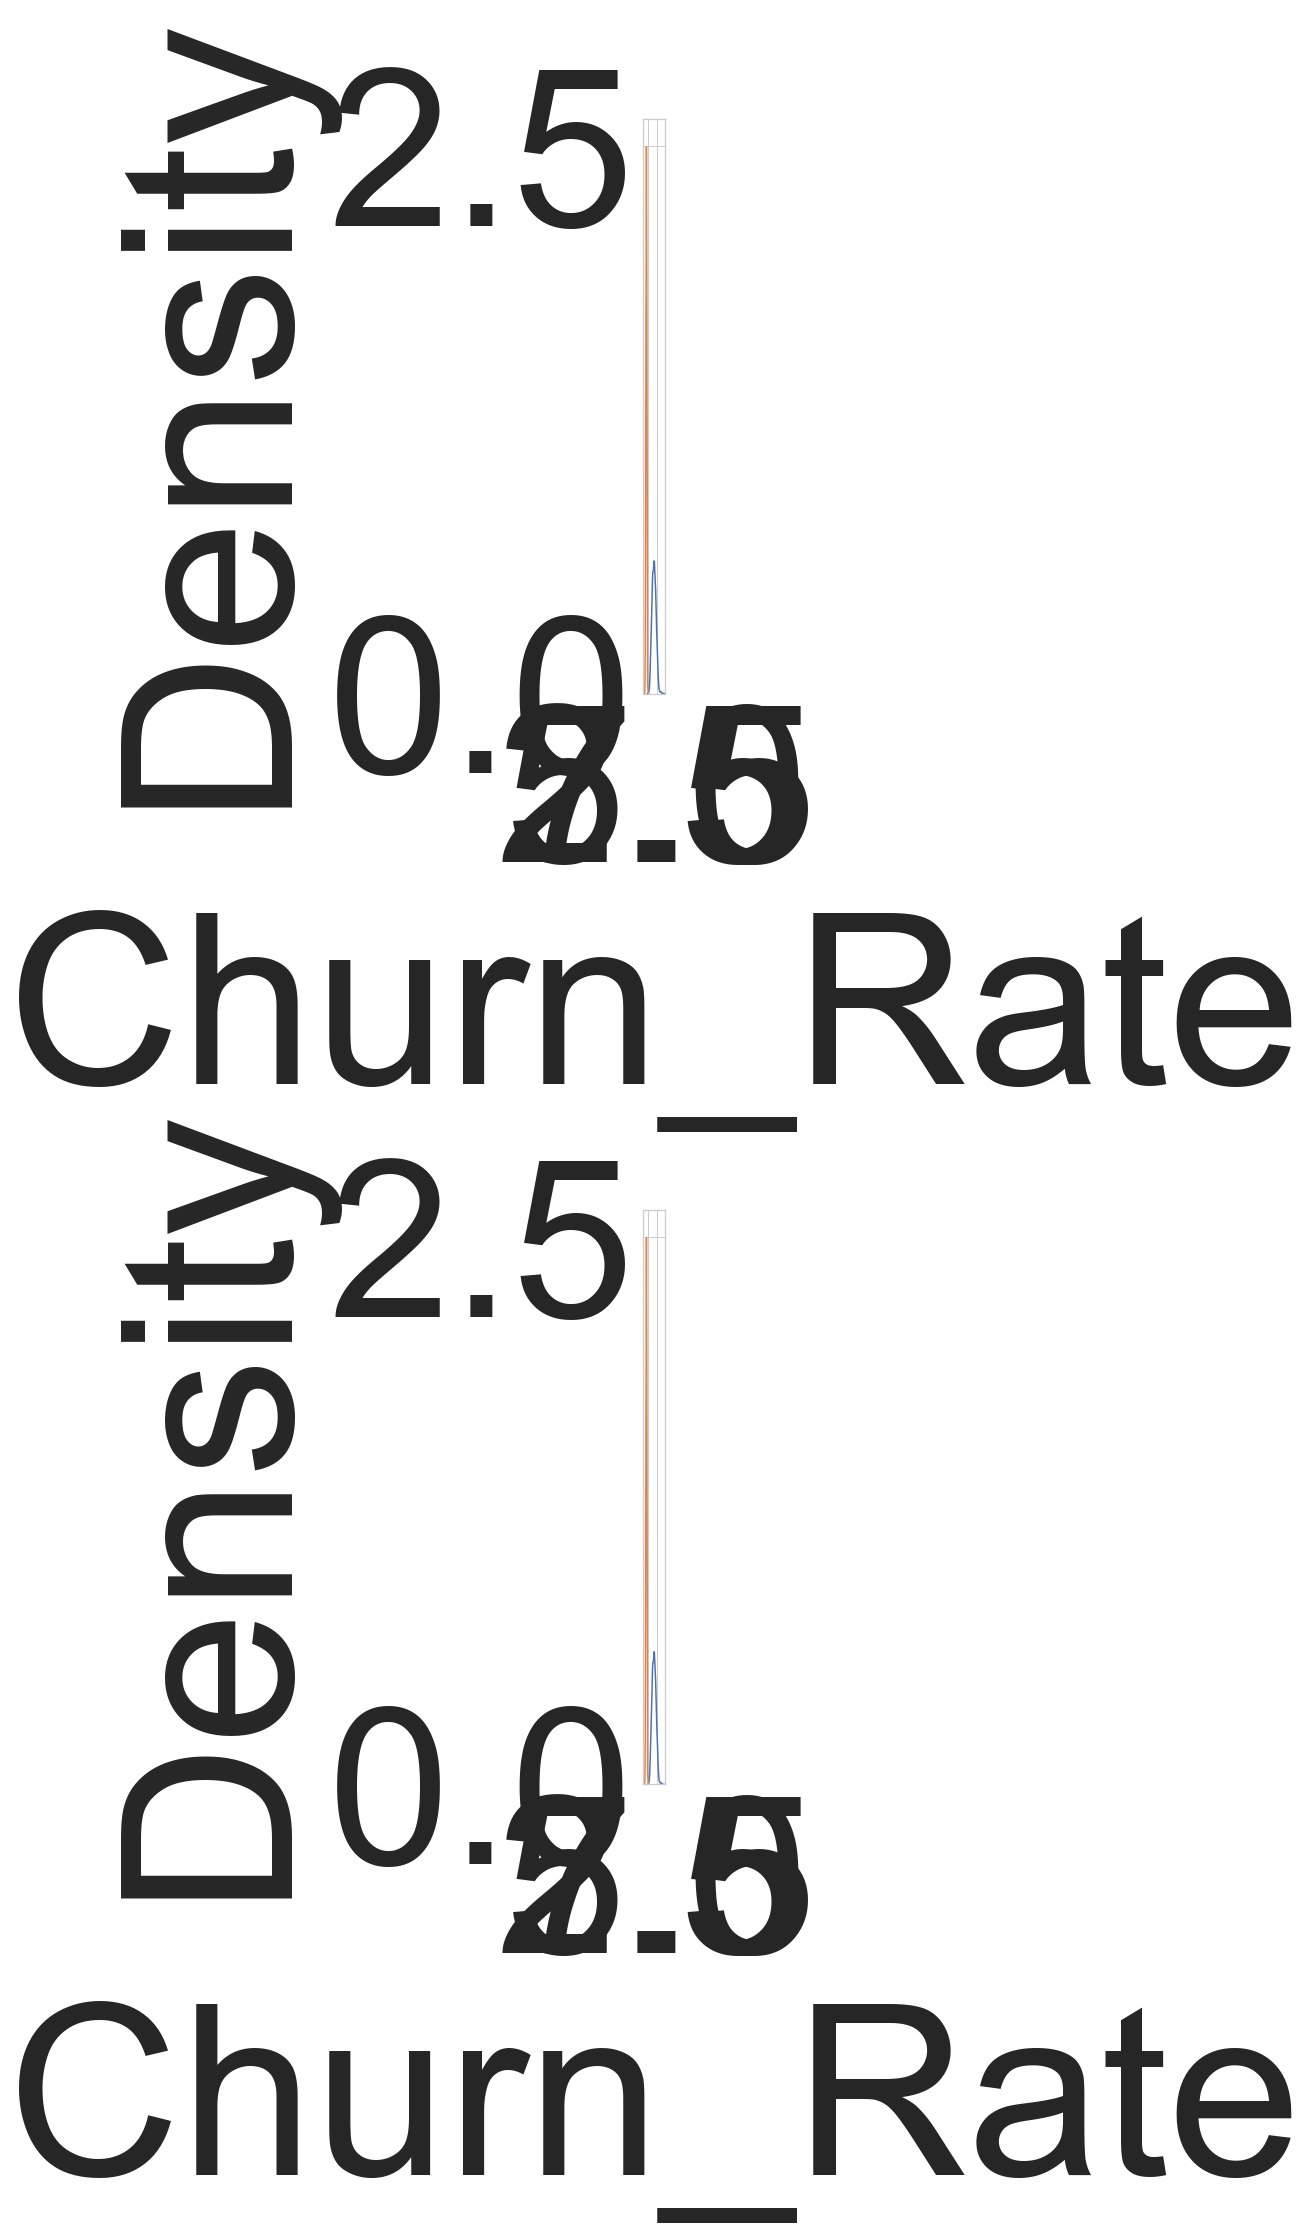

In [88]:
skewness = skewness[abs(skewness["Skew"]) > 0.8]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
skewed_fea_df = pd.DataFrame()
for feat in skewed_features:
    #all_data[feat] += 1
    skewed_fea_df[feat] = loneliness_df[feat].values
    loneliness_df[feat] = boxcox1p(loneliness_df[feat], lam)
    


In [ ]:
# sns.distplot(train['SalePrice'] , fit=norm);

# # Get the fitted parameters used by the function
# (mu, sigma) = norm.fit(train['SalePrice'])
# print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# #Now plot the distribution
# plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
#             loc='best')
# plt.ylabel('Frequency')
# plt.title('SalePrice distribution')

# #Get also the QQ-plot
# fig = plt.figure()
# res = stats.probplot(train['SalePrice'], plot=plt)
# plt.show()

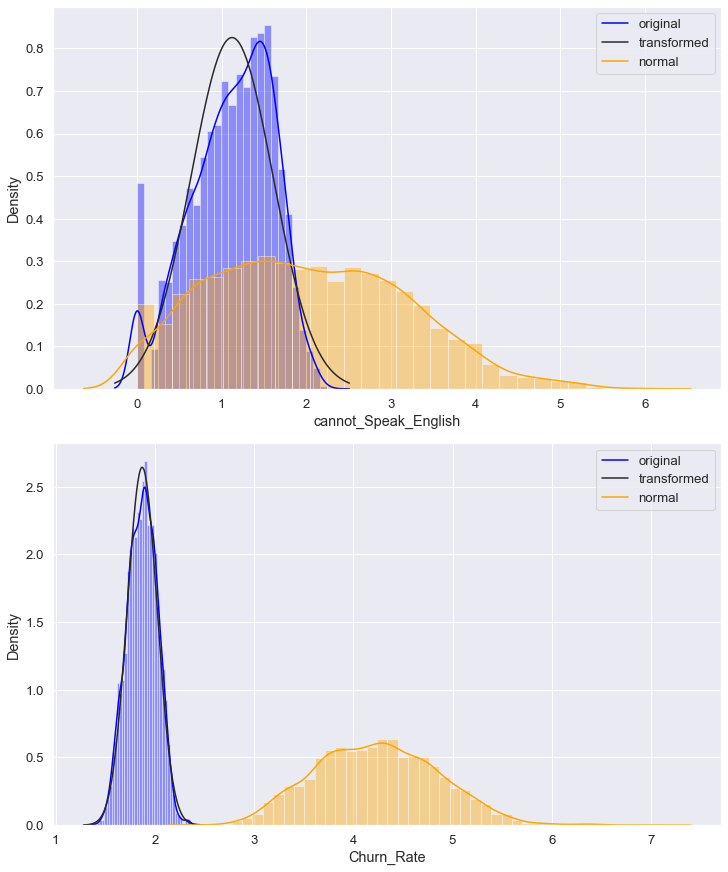

In [128]:
from scipy.stats import norm
fig,axes = plt.subplots(skewness.shape[0],1,constrained_layout=True,figsize=(10,6*skewness.shape[0]))
sns.set(font_scale=1.2)
for i in range(skewness.shape[0]):
    sns.distplot(loneliness_df[skewed_features[i]], fit=norm,ax=axes[i],color="blue")
    sns.distplot(skewed_fea_df[skewed_features[i]],ax=axes[i],color="orange")
    
    axes[i].legend(["original","transformed","normal"])


In [45]:
# num = loneliness_df.shape[1]-2
# fig,axes = plt.subplots(3,5,constrained_layout=True,figsize=(10,24))
# for i in range(num):
# sns.distplot(df.loc[:,feature],norm_hist=True,ax=axes[0])

ValueError: If using all scalar values, you must pass an index

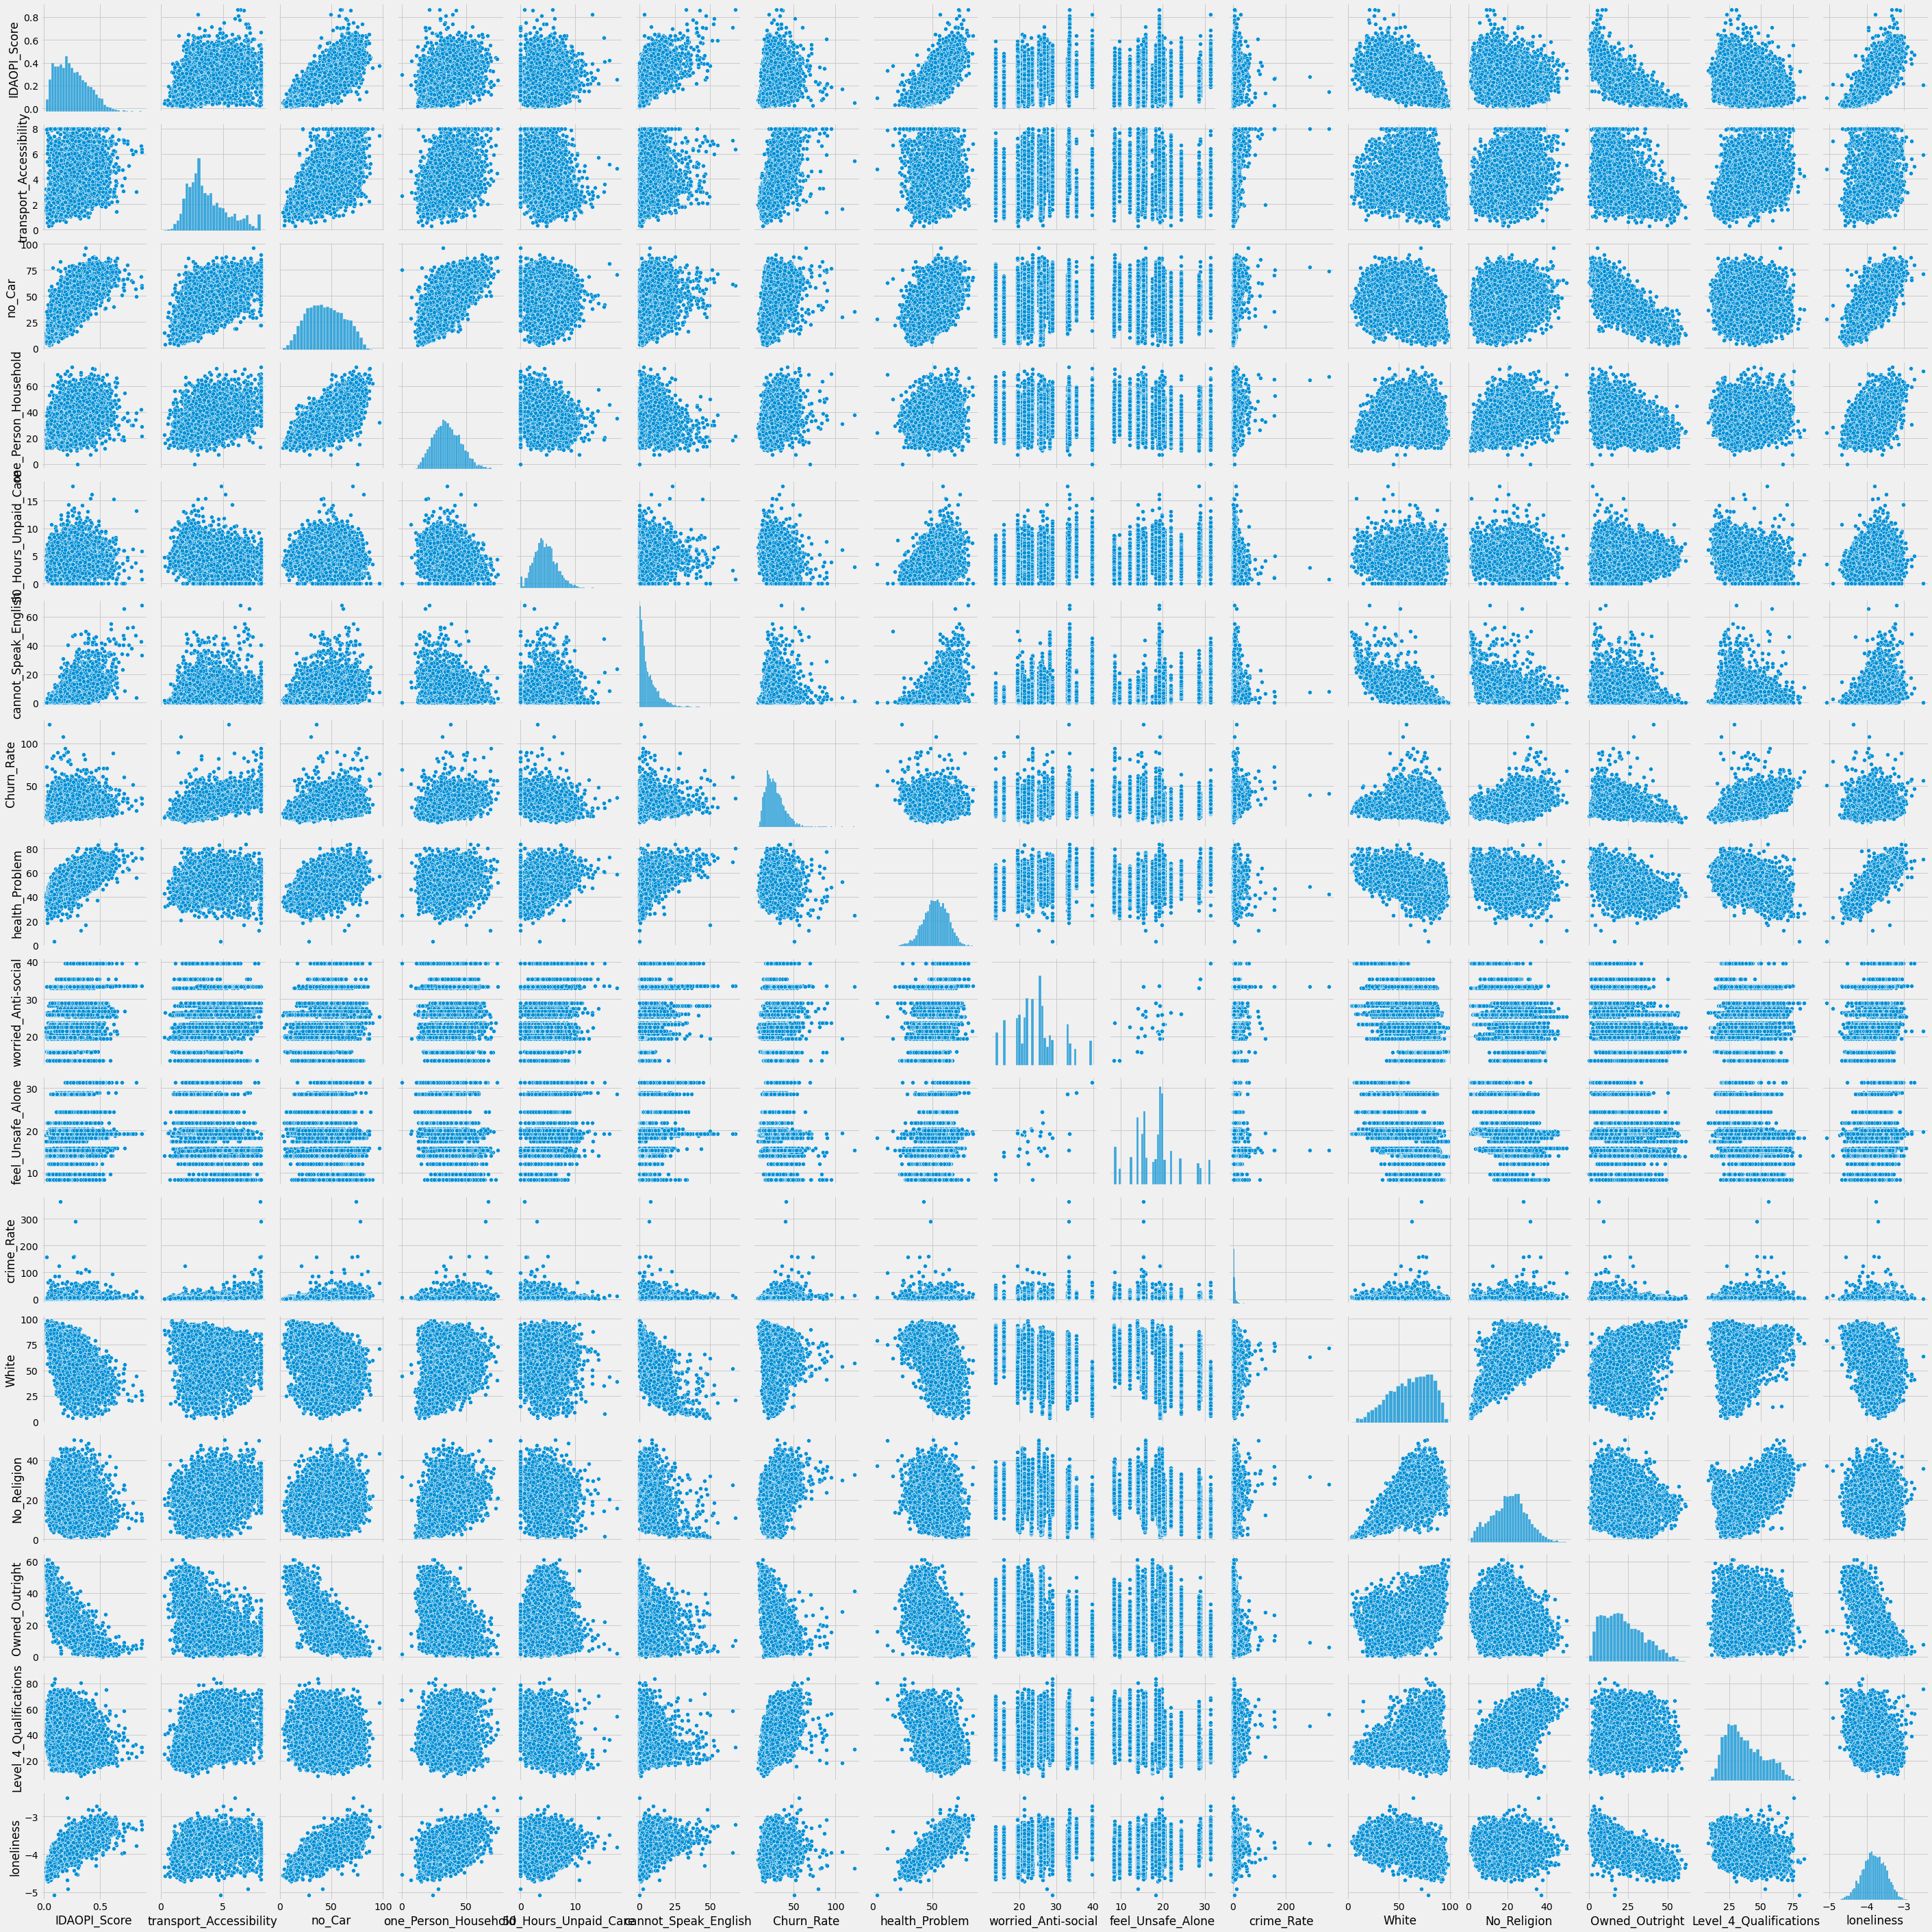

In [44]:
sns.pairplot(loneliness_df[2:])

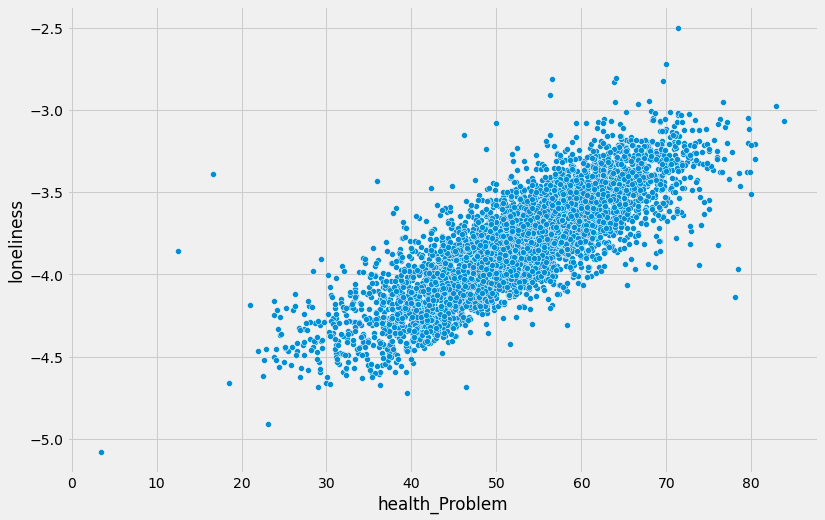

In [42]:
# 散点图适合连续变量，这是为连续变量定制的
def customized_num_scatterplot(y, x):
    style.use('fivethirtyeight')
    plt.subplots(figsize=(12,8))
    sns.scatterplot(y=y,x=x)

customized_num_scatterplot(loneliness_df["loneliness"], loneliness_df["health_Problem"])

In [41]:
# census_data_copy = census_data.copy(deep=True)
# census_data_copy.columns = ['_'.join([re.sub("\W","_",str(x)) for x in col]) for col in census_data_copy.columns]
# household_df = get_ratio("Household Composition", 5)
# ethnic_df = get_ratio("Ethnic Group",6)
# religion_df =  get_ratio("Religion",9)
# religion_df.head()